In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing
from darts.metrics import mape, mse
from darts.utils.statistics import check_seasonality, plot_acf


In [ ]:
# https://github.com/unit8co/darts/blob/master/examples/RNN-examples.ipynb
# https://github.com/unit8co/darts/blob/master/examples/darts-intro.ipynb

In [15]:
df = pd.read_csv('./data.csv', index_col=['Date'])
df.index = pd.to_datetime(df.index)
series = TimeSeries.from_dataframe(df, None, '7_day_avg_new_cases')
train, val = series.split_after(pd.Timestamp('2020-09-30'))

In [19]:
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [23]:
my_model = RNNModel(
    model='LSTM',
    output_length=1,
    hidden_size=25,
    n_rnn_layers=4,
    input_length=7,
    dropout=0.4,
    batch_size=16,
    n_epochs=400,
    optimizer_kwargs={'lr': 1e-3}, 
    model_name='Air_RNN',
    log_tensorboard=True,
    random_state=42
)

In [24]:
my_model.fit(train_transformed, val_training_series=val_transformed, verbose=True)

Training loss: 0.0063, validation loss: 0.0004


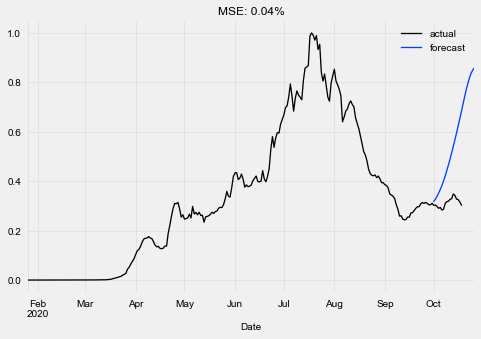

In [27]:
def eval_model(model):
    pred_series = model.predict(n=26)
    plt.figure(figsize=(8,5))
    series_transformed.plot(label='actual')
    pred_series.plot(label='forecast')
    plt.title('MSE: {:.2f}%'.format(mse(pred_series, val_transformed)))
    plt.legend();
    
eval_model(my_model)

loading model_best_390.pth.tar


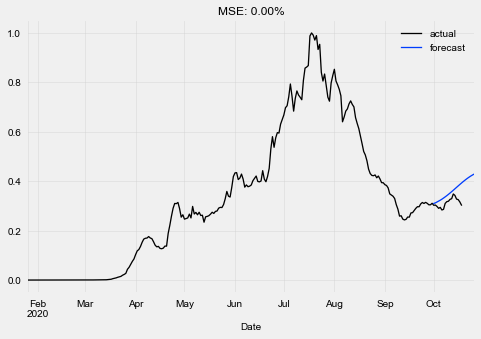

In [28]:
best_model = RNNModel.load_from_checkpoint(model_name='Air_RNN', best=True)
eval_model(best_model)